In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, FloatSlider, IntSlider
from ipywidgets import interactive, VBox, HBox, Output

# --- Define the parabola function ---
def f(x):
    return x**2  # simple convex function

def df(x):
    return 2*x  # derivative

# --- Optimization routine ---
def optimize(optimizer="GD", lr=0.1, epochs=20, momentum=0.9):
    x = -8 # np.random.uniform(-8, 8)  # random start
    v = 0  # momentum buffer
    history = [x]

    for i in range(epochs):
        grad = df(x)

        if optimizer == "GD":
            x = x - lr * grad

        elif optimizer == "Momentum":
            v = momentum * v - lr * grad
            x = x + v

        history.append(x)

    return np.array(history)

# --- Plotting function ---
def train_and_plot(optimizer, lr, epochs, momentum):
    xs = np.linspace(-10, 10, 400)
    ys = f(xs)

    path = optimize(optimizer, lr, epochs, momentum)
    path_y = f(path)

    plt.figure(figsize=(8,6))
    plt.plot(xs, ys, label="f(x) = x²", color="blue", alpha=0.5)
    plt.plot(path, path_y, color="red", linestyle="--", alpha=0.7, zorder=3)
    plt.scatter(path[:-1], path_y[:-1], s=60, label="Steps", marker="o", facecolors='none', edgecolors='black', zorder=4)
    plt.scatter(path[-1], path_y[-1], color="red", s=80, label="Final Step", marker="x", zorder=5)

    plt.title(f"Params: lr={lr:.2f}, epochs={epochs}, momentum={momentum:.2f}" if optimizer=="Momentum" else f"{optimizer}: lr={lr:.2f}, epochs={epochs}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()

# --- Widgets ---
# Define widgets with default values
optimizer_widget = Dropdown(options=["GD", "Momentum"], value="GD", description="Optimizer")

# Store defaults for reset
defaults = {
    "lr": 0.05,
    "epochs": 10,
    "momentum": 0.75
}

lr_widget = FloatSlider(value=defaults["lr"], min=0.01, max=1.0, step=0.01, description="Learning rate", readout_format=".2f")
epochs_widget = IntSlider(value=defaults["epochs"], min=5, max=100, step=5, description="Epochs")
momentum_widget = FloatSlider(value=defaults["momentum"], min=0.1, max=0.99, step=0.05, description="Momentum", readout_format=".2f")
momentum_widget.layout.visibility = 'hidden'

def on_optimizer_change(change):
    if change["name"] == "value":
        lr_widget.value = defaults["lr"]
        epochs_widget.value = defaults["epochs"]
        momentum_widget.value = defaults["momentum"]

        if change["new"] == "Momentum":
            momentum_widget.layout.visibility = 'visible'
        else:
            momentum_widget.layout.visibility = 'hidden'

optimizer_widget.observe(on_optimizer_change, names="value")

ui = VBox([optimizer_widget, lr_widget, epochs_widget, momentum_widget])
out = Output()

def wrapped_train_and_plot(optimizer, lr, epochs, momentum):
    with out:
        out.clear_output(wait=True)
        train_and_plot(optimizer, lr, epochs, momentum)

interactive_plot = interactive(
    wrapped_train_and_plot,
    optimizer=optimizer_widget,
    lr=lr_widget,
    epochs=epochs_widget,
    momentum=momentum_widget,
)

display(ui, out)


Output()

In [ ]:

# # --- Loss function ---
# def compute_loss(y_true, y_pred):
#     return np.mean((y_true - y_pred) ** 2)

# # --- Training function with different optimizers ---
# def gradient_descent(x, y, lr, epochs, optimizer="GD", momentum_beta=0.9):
#     w, b = np.random.randn(), np.random.randn()
#     v_w, v_b = 0, 0
#     losses, ws, bs = [], [], []

#     for epoch in range(epochs):
#         if optimizer == "GD":
#             # Full batch
#             y_pred = w * x + b
#             dw = -2 * np.mean(x * (y - y_pred))
#             db = -2 * np.mean(y - y_pred)

#         elif optimizer == "SGD":
#             # Single sample
#             i = np.random.randint(0, len(x))
#             xi, yi = x[i], y[i]
#             y_pred = w * xi + b
#             dw = -2 * xi * (yi - y_pred)
#             db = -2 * (yi - y_pred)

#         elif optimizer == "Momentum":
#             y_pred = w * x + b
#             dw = -2 * np.mean(x * (y - y_pred))
#             db = -2 * np.mean(y - y_pred)

#             v_w = momentum_beta * v_w + lr * dw
#             v_b = momentum_beta * v_b + lr * db
#             w -= v_w
#             b -= v_b
#             losses.append(compute_loss(y, w * x + b))
#             ws.append(w); bs.append(b)
#             continue

#         # Standard update (GD or SGD)
#         w -= lr * dw
#         b -= lr * db

#         losses.append(compute_loss(y, w * x + b))
#         ws.append(w); bs.append(b)

#     return ws, bs, losses

# # --- Interactive plot function ---
# def train_and_plot(optimizer, lr, epochs):
#     ws, bs, losses = gradient_descent(X, y, lr, epochs, optimizer)

#     # Final model
#     y_pred = ws[-1] * X + bs[-1]

#     fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#     # Left: regression fit
#     axs[0].scatter(X, y, color="green", alpha=0.6, label="Data (sampled)")
#     axs[0].plot(X, y_pred, color="red", linewidth=2, label="Regression line")
#     axs[0].set_title(f"Fit after {epochs} epochs ({optimizer})")
#     axs[0].set_xlabel("Elevation")
#     axs[0].set_ylabel("Slope")
#     axs[0].legend()

#     # Right: loss curve
#     axs[1].plot(losses, color="blue")
#     axs[1].set_title("Loss over Epochs")
#     axs[1].set_xlabel("Epoch")
#     axs[1].set_ylabel("MSE Loss")
#     axs[1].grid(True)

#     plt.show()

# # --- Widgets ---
# optimizer_dd = Dropdown(options=["GD", "SGD", "Momentum"], value="GD", description="Optimizer")
# lr_slider = FloatSlider(value=1e-9, min=1e-9, max=1e-6, step=5e-9, description="Learning rate", readout_format=".1e")
# epoch_slider = IntSlider(value=5, min=5, max=30, step=5, description="Epochs")

# interact(train_and_plot, optimizer=optimizer_dd, lr=lr_slider, epochs=epoch_slider)

In [ ]:
# --- Import libraries ---
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider, Dropdown

# --- Load Covertype dataset ---
print("Loading Covertype dataset...")

df_loaded = pd.read_pickle("covtype_sample.pkl.gz", compression="gzip")
X_sample = df_loaded.drop("Cover_Type", axis=1)
y_sample = df_loaded["Cover_Type"]

print(f"Dataset shape: {X_sample.shape}, Target shape: {y_sample.shape}")


Loading Covertype dataset...
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0     3036.0    76.0   29.0                             256.0   
1     2967.0   327.0   17.0                             283.0   
2     2979.0    18.0   18.0                             708.0   
3     3160.0   301.0   17.0                             277.0   
4     3004.0   342.0   12.0                             391.0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                           115.0                           2148.0   
1                            51.0                           1906.0   
2                           160.0                           1355.0   
3                            84.0                           2918.0   
4                            72.0                           3185.0   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0          241.0           173.0           42.0   
1          176.0           218.0          181.0   
2     

In [23]:

# --- Preprocessing ---
# Identify numeric features vs categorical features
numeric_features = X_sample.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = []  # Covertype already has binary indicators for categories

# Column transformer: standardize numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
        # No categorical encoding needed; all one-hot already encoded
    ]
)

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42, stratify=y_sample
)


Training Random Forest classifier...

Classification report:

              precision    recall  f1-score   support

           1       0.74      0.74      0.74      7292
           2       0.76      0.83      0.79      9752
           3       0.72      0.85      0.78      1231
           4       0.83      0.41      0.55        94
           5       1.00      0.01      0.02       327
           6       0.90      0.16      0.27       598
           7       0.95      0.50      0.66       706

    accuracy                           0.75     20000
   macro avg       0.84      0.50      0.54     20000
weighted avg       0.76      0.75      0.74     20000



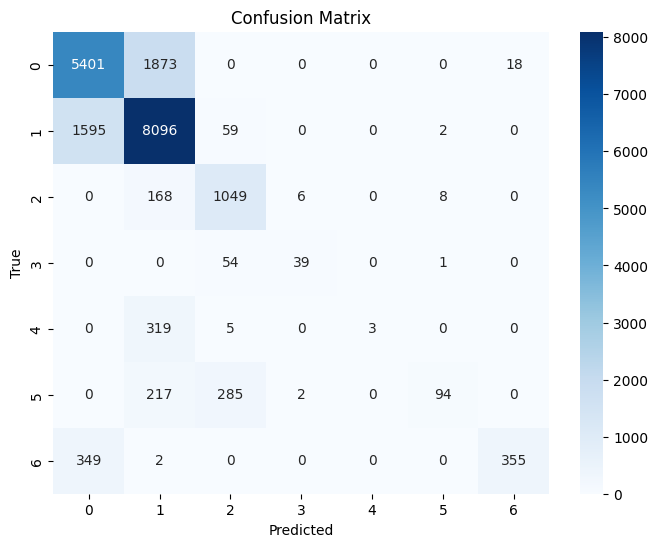

interactive(children=(IntSlider(value=100, description='Trees', max=200, min=10, step=10), IntSlider(value=10,…

<function __main__.interactive_rf(n_estimators=50, max_depth=5)>

In [21]:

# --- Build pipeline ---
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1))
])

# --- Fit model ---
print("Training Random Forest classifier...")
clf_pipeline.fit(X_train, y_train)

# --- Evaluate ---
y_pred = clf_pipeline.predict(X_test)
print("\nClassification report:\n")
print(classification_report(y_test, y_pred))

# --- Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Interactive exploration ---
# Allow students to adjust number of trees and depth
def interactive_rf(n_estimators=50, max_depth=5):
    clf_pipeline.set_params(classifier__n_estimators=n_estimators, classifier__max_depth=max_depth)
    clf_pipeline.fit(X_train, y_train)
    score = clf_pipeline.score(X_test, y_test)
    print(f"Random Forest test accuracy with n_estimators={n_estimators}, max_depth={max_depth}: {score:.3f}")

interact(interactive_rf,
         n_estimators=IntSlider(min=10, max=200, step=10, value=100, description="Trees"),
         max_depth=IntSlider(min=2, max=20, step=1, value=10, description="Max Depth"))